In [122]:

from PyFoam.Execution.ConvergenceRunner import ConvergenceRunner
from PyFoam.Execution.UtilityRunner import UtilityRunner
from PyFoam.LogAnalysis.BoundingLogAnalyzer import BoundingLogAnalyzer
from PyFoam.RunDictionary.SolutionFile import SolutionFile
from PyFoam.RunDictionary.SolutionDirectory import SolutionDirectory

import pyvista as vtki
import numpy as np
import os



solver="icoFoam"
case="cavity"
#pCmd="calcPressureDiff*erence"
#mCmd="calcMassFlow"

%cd /home/frederik/OpenFOAM/frederik-7/run/cavity
!./Allclean
!./Allrun
%cd /home/frederik/OpenFOAM/frederik-7/run/

/home/frederik/OpenFOAM/frederik-7/run/cavity
Cleaning /home/frederik/OpenFOAM/frederik-7/run/cavity case
Running surfaceFeatures on /home/frederik/OpenFOAM/frederik-7/run/cavity
Running blockMesh on /home/frederik/OpenFOAM/frederik-7/run/cavity
Running decomposePar on /home/frederik/OpenFOAM/frederik-7/run/cavity
Running snappyHexMesh on /home/frederik/OpenFOAM/frederik-7/run/cavity
Running patchSummary on /home/frederik/OpenFOAM/frederik-7/run/cavity
/home/frederik/OpenFOAM/frederik-7/run


In [123]:
dire=SolutionDirectory(case,archive="InletVel")
dire.clearResults()
#dire.addBackup("PyFoamSolve.logfile")
#dire.addBackup("PyFoamSolve.analyzed")
#dire.addBackup("Pressure.analyzed")
#dire.addBackup("MassFlow.analyzed")
dire.addBackup("constant")
dire.addBackup("system")
    
sol=SolutionFile(dire.initialDir(),"U")

In [124]:
maximum=1.
nr=10
name="InletVelResults" 
f=dire.makeFile(name)
 
for i in range(nr+1):
    # Set the boundary condition at the inlet
    val=(maximum*i)/nr
    print("Wandgeschw:",val)
    sol.replaceBoundary("left","(%f 0 0)" %(val))

    # Run the solver
    run=ConvergenceRunner(BoundingLogAnalyzer(),argv=[solver,"-case",case],silent=True)
    run.start()
    
    print("Last Time = ",dire.getLast())

    # Get the pressure difference (Using an external utility)
    #pUtil=UtilityRunner(argv=[pCmd,"-case",case],silent=True,logname="Pressure")
    #pUtil.add("deltaP","Pressure at .* Difference .*\] (.+)")
    #pUtil.start()

    #deltaP=pUtil.get("deltaP")[0]

    # Get the mass flow
    #mUtil=UtilityRunner(argv=[mCmd,"-case",case,"-latestTime"],silent=True,logname="MassFlow")
    #mUtil.add("mass","Flux at (.+?) .*\] (.+)",idNr=1)
    #mUtil.start()

    #massFlow=mUtil.get("mass",ID="outlet")[0]

    # Archive the results
    
    dire.lastToArchive("vel=%g" % (val))
    
    CurrentPath=os.path.join('/home/frederik/OpenFOAM/frederik-7/run', case, 'InletVel',"vel=%g" % (val))
    
    
    %cd $CurrentPath
    !foamToVTK
    %cd /home/frederik/OpenFOAM/frederik-7/run/ 
    # Clear results
    dire.clearResults()

    # Output current stuff
    #print("Vel: ",val,"DeltaP: ",deltaP,"Mass Flow:",massFlow)
    #f.writeLine( (val,deltaP,massFlow) )
    
sol.purgeFile()


Wandgeschw: 0.0
Last Time =  0.025
/home/frederik/OpenFOAM/frederik-7/run/cavity/InletVel/vel=0
/*---------------------------------------------------------------------------*\
  =========                 |
  \\      /  F ield         | OpenFOAM: The Open Source CFD Toolbox
   \\    /   O peration     | Website:  https://openfoam.org
    \\  /    A nd           | Version:  7
     \\/     M anipulation  |
\*---------------------------------------------------------------------------*/
Build  : 7-ca808c8420bf
Exec   : foamToVTK
Date   : Dec 18 2019
Time   : 14:01:02
Host   : "frederik-WRT-WX9"
PID    : 6976
I/O    : uncollated
Case   : /home/frederik/OpenFOAM/frederik-7/run/cavity/InletVel/vel=0
nProcs : 1
sigFpe : Enabling floating point exception trapping (FOAM_SIGFPE).
fileModificationChecking : Monitoring run-time modified files using timeStampMaster (fileModificationSkew 10)
allowSystemOperations : Allowing user-supplied system call operations

// * * * * * * * * * * * * * * * * * * *

 PyFoam WARNING on line 509 of file /home/frederik/anaconda3/lib/python3.7/site-packages/PyFoam/Execution/BasicRunner.py : Stopping run and writting 


/home/frederik/OpenFOAM/frederik-7/run
Wandgeschw: 0.1
Last Time =  0
/home/frederik/OpenFOAM/frederik-7/run/cavity/InletVel/vel=0.1
/*---------------------------------------------------------------------------*\
  =========                 |
  \\      /  F ield         | OpenFOAM: The Open Source CFD Toolbox
   \\    /   O peration     | Website:  https://openfoam.org
    \\  /    A nd           | Version:  7
     \\/     M anipulation  |
\*---------------------------------------------------------------------------*/
Build  : 7-ca808c8420bf
Exec   : foamToVTK
Date   : Dec 18 2019
Time   : 14:01:02
Host   : "frederik-WRT-WX9"
PID    : 6986
I/O    : uncollated
Case   : /home/frederik/OpenFOAM/frederik-7/run/cavity/InletVel/vel=0.1
nProcs : 1
sigFpe : Enabling floating point exception trapping (FOAM_SIGFPE).
fileModificationChecking : Monitoring run-time modified files using timeStampMaster (fileModificationSkew 10)
allowSystemOperations : Allowing user-supplied system call operations

/

/home/frederik/OpenFOAM/frederik-7/run
Wandgeschw: 0.6
Last Time =  0
/home/frederik/OpenFOAM/frederik-7/run/cavity/InletVel/vel=0.6
/*---------------------------------------------------------------------------*\
  =========                 |
  \\      /  F ield         | OpenFOAM: The Open Source CFD Toolbox
   \\    /   O peration     | Website:  https://openfoam.org
    \\  /    A nd           | Version:  7
     \\/     M anipulation  |
\*---------------------------------------------------------------------------*/
Build  : 7-ca808c8420bf
Exec   : foamToVTK
Date   : Dec 18 2019
Time   : 14:01:04
Host   : "frederik-WRT-WX9"
PID    : 7021
I/O    : uncollated
Case   : /home/frederik/OpenFOAM/frederik-7/run/cavity/InletVel/vel=0.6
nProcs : 1
sigFpe : Enabling floating point exception trapping (FOAM_SIGFPE).
fileModificationChecking : Monitoring run-time modified files using timeStampMaster (fileModificationSkew 10)
allowSystemOperations : Allowing user-supplied system call operations

/

/home/frederik/OpenFOAM/frederik-7/run


In [125]:
%cd /home/frederik/OpenFOAM/frederik-7/run/cavity
!foamToVTK
%cd /home/frederik/OpenFOAM/frederik-7/run/




/home/frederik/OpenFOAM/frederik-7/run/cavity
/*---------------------------------------------------------------------------*\
  =========                 |
  \\      /  F ield         | OpenFOAM: The Open Source CFD Toolbox
   \\    /   O peration     | Website:  https://openfoam.org
    \\  /    A nd           | Version:  7
     \\/     M anipulation  |
\*---------------------------------------------------------------------------*/
Build  : 7-ca808c8420bf
Exec   : foamToVTK
Date   : Dec 18 2019
Time   : 14:01:08
Host   : "frederik-WRT-WX9"
PID    : 7051
I/O    : uncollated
Case   : /home/frederik/OpenFOAM/frederik-7/run/cavity
nProcs : 1
sigFpe : Enabling floating point exception trapping (FOAM_SIGFPE).
fileModificationChecking : Monitoring run-time modified files using timeStampMaster (fileModificationSkew 10)
allowSystemOperations : Allowing user-supplied system call operations

// * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * //
Create time

Create mesh 

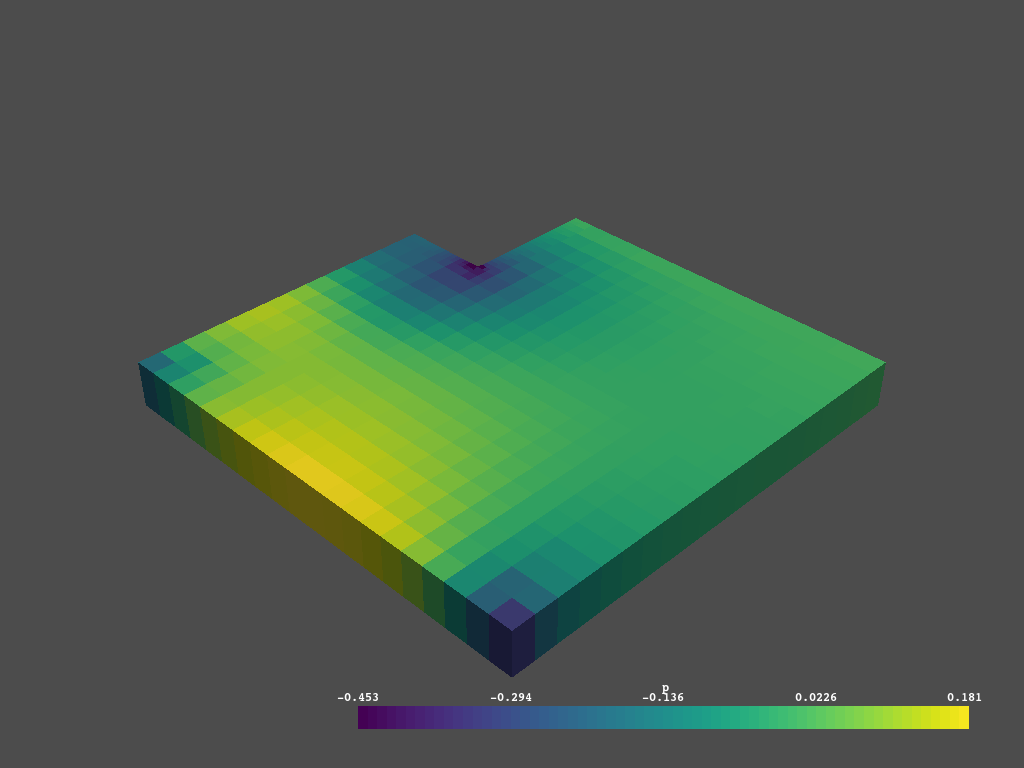

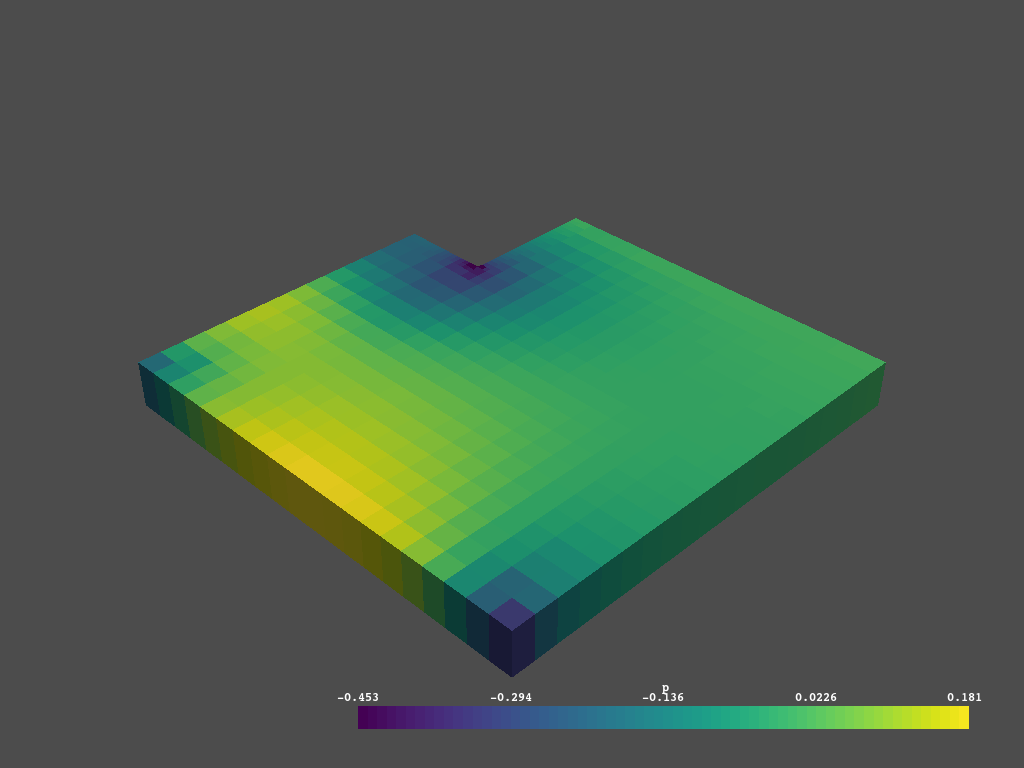

In [131]:

grid = vtki.UnstructuredGrid('cavity/InletVel/vel=0.9/VTK/vel=0.9_100.vtk')
grid.plot()
plotter = vtki.Plotter(off_screen=False)
plotter.add_mesh(grid)
plotter.show(screenshot='airplane.png')



In [93]:
CurrentPath=os.path.join('/home/frederik/OpenFOAM/frederik-7/run', 'case', name,"vel=%g" % (val))

In [95]:
CurrentPath

'/home/frederik/OpenFOAM/frederik-7/run/case/InletVelResults/vel=1'

In [98]:
%cd $CurrentPath
!foamToVTK
%cd /home/frederik/OpenFOAM/frederik-7/run/

[Errno 2] No such file or directory: '/home/frederik/OpenFOAM/frederik-7/run/case/InletVelResults/vel=1'
/home/frederik/OpenFOAM/frederik-7/run
/*---------------------------------------------------------------------------*\
  =========                 |
  \\      /  F ield         | OpenFOAM: The Open Source CFD Toolbox
   \\    /   O peration     | Website:  https://openfoam.org
    \\  /    A nd           | Version:  7
     \\/     M anipulation  |
\*---------------------------------------------------------------------------*/
Build  : 7-ca808c8420bf
Exec   : foamToVTK
Date   : Dec 18 2019
Time   : 13:52:31
Host   : "frederik-WRT-WX9"
PID    : 5559
I/O    : uncollated
Case   : /home/frederik/OpenFOAM/frederik-7/run
nProcs : 1
sigFpe : Enabling floating point exception trapping (FOAM_SIGFPE).
fileModificationChecking : Monitoring run-time modified files using timeStampMaster (fileModificationSkew 10)
allowSystemOperations : Allowing user-supplied system call operations

// * * * * * *